In [1]:
import os
import sys

import matplotlib.pyplot as plt

import numpy as np
import torch
import pandas as pd
from train.TrainPlanningOperator2D import PlanningOperator2D
from heuristics import generaterandompos
from heuristics import euclideannorm, FMM, dijkstra, planningoperator, manhattandistance
from heuristics import testheuristiconmaps, testheuristiconsinglemap



Load Test Maps

In [2]:
Ntotal = 550
ntest = 50
ntrain = 250
sub = 1
Sx = Sy = int(((512 - 1) / sub) + 1)
dataset_dir = '/mountvol2/2D-512-Dataset-0/' #Change directory based on actual location
maps = np.load(dataset_dir+'mask.npy')

maps = maps[:Ntotal][-ntest:, ::sub, ::sub][:, :Sx, :Sy]


Load Saved Start and Goal Positions

In [3]:
startpositions = np.load(dataset_dir+'startpositions.npy')
goalpositions = np.load(dataset_dir+'goalpositions.npy')

Comparing Euclidean and Manhattan Distance

In [4]:
# Euclidean Norm
print("Testing Euclidean Norm")
euclidean_results = testheuristiconmaps(startpositions, goalpositions, maps, euclideannorm, plotresults=False, printvalues=True)


Testing Euclidean Norm
Average Path Cost: 311.2137097306642 
Average Planning Time: 1.3042719507217406 
Average Number of Node Expansions: 14850.22 
Average Success Rate: 1.0


Planning Operator

In [ ]:
# Model
modes = 8
width = 24
nlayers = 1

model = PlanningOperator2D(modes, modes, width, nlayers)
model.load_state_dict(torch.load(dataset_dir+"planningoperator_street_maps_512x512_8m_12w_1l_b20/n500_lr5.000000e-03_gamma5.000000e-01_wd3.000000e-06_seed5/model512.ckpt")) #Change Model location
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

erosion_values = []
avgpathcost_values = []
avgplantime_values = []
avginfertime_values = []
avgnodesexp_values = []
avgsuccessrate_values = []



/tmp/ipykernel_4282/715143376.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(dataset_dir+"planningoperator_street_maps_512x512_8m_12w_1

No erosion

In [6]:
print("Testing PNO")
no_results = testheuristiconmaps(startpositions, goalpositions, maps, planningoperator, plotresults=False, printvalues=True, erosion = 1, model=model)

Testing PNO
Average Path Cost: 315.24885691692197 
Average Planning Time: 0.7390680885314942 
Average Number of Node Expansions: 8882.34 
Average Success Rate: 1.0


With Erosion

In [7]:
print("Testing PNO")
no_results = testheuristiconmaps(startpositions, goalpositions, maps, planningoperator, plotresults=False, printvalues=True, erosion = 14, model=model)

Testing PNO
Average Path Cost: 311.72400410317954 
Average Planning Time: 0.8617516803741455 
Average Number of Node Expansions: 9869.62 
Average Success Rate: 1.0


100%|██████████| 29/29 [01:24<00:00,  2.91s/it]


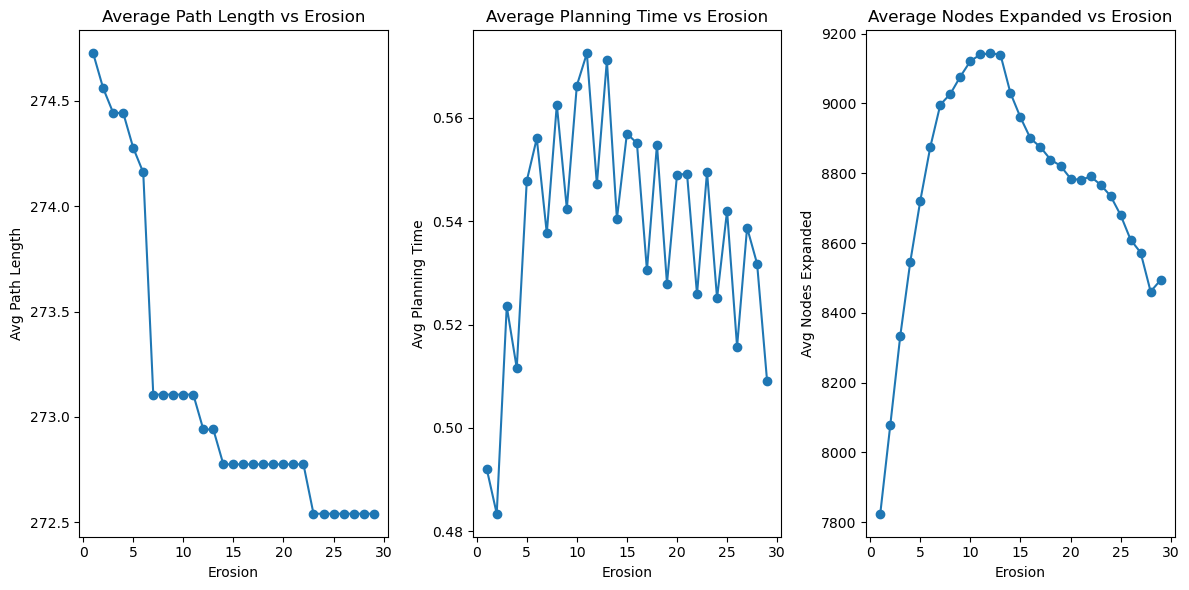

In [ ]:

from tqdm import tqdm 

erosionmaps = maps[::10, :, :]
erosionstartpos = startpositions[::10,:]
erosiongoalpos = goalpositions[::10,:]

erosion_values = []
avgpathcost_values = []
avgplantime_values = []
avginfertime_values = []
avgnodesexp_values = []
avgsuccessrate_values = []

# Run the loop and store results
for erode in tqdm(range(1, 30)):
    
    # Call your function and store the results
    avgpathcost, avgplantime, avginfertime, avgnodesexp, avgsuccessrate = testheuristiconmaps(
        erosionstartpos, erosiongoalpos, erosionmaps, planningoperator, model=model, erosion=erode, plotresults=False, printvalues=False
    )
    
    # Append results to lists
    erosion_values.append(erode)
    avgpathcost_values.append(avgpathcost)
    avgplantime_values.append(avgplantime)
    avginfertime_values.append(avginfertime)
    avgnodesexp_values.append(avgnodesexp)
    avgsuccessrate_values.append(avgsuccessrate)

plt.figure(figsize=(12, 6))

# Plot for avgpathcost (Average Path Length)
plt.subplot(1, 3, 1)
plt.plot(erosion_values, avgpathcost_values, marker='o')
plt.title('Average Path Length vs Erosion')
plt.xlabel('Erosion')
plt.ylabel('Avg Path Length')

# Plot for avgplantime (Average Planning Time)
plt.subplot(1, 3, 2)
plt.plot(erosion_values, avgplantime_values, marker='o')
plt.title('Average Planning Time vs Erosion')
plt.xlabel('Erosion')
plt.ylabel('Avg Planning Time')

# Plot for avgnodesexp (Average Nodes Expanded)
plt.subplot(1, 3, 3)
plt.plot(erosion_values, avgnodesexp_values, marker='o')
plt.title('Average Nodes Expanded vs Erosion')
plt.xlabel('Erosion')
plt.ylabel('Avg Nodes Expanded')

plt.tight_layout()
plt.show()

Test Single Maps

Plotting Euclidean Norm
Average Path Cost: 365.19090885901073 
Average Planning Time: 1.1119959354400635 
Average Number of Node Expansions: 16321.0 
Average Success Rate: 1.0


(365.19090885901073, 1.1119959354400635, 0, 16321.0, 1.0)

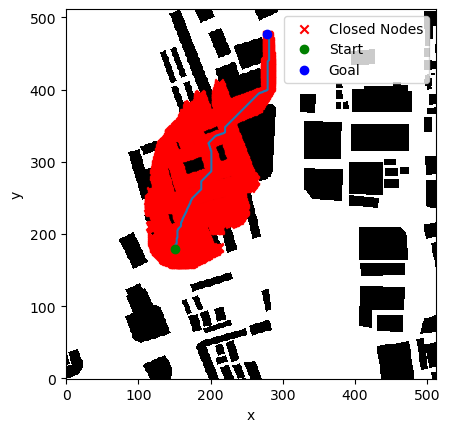

In [11]:
maptest = maps[0,:,:].reshape(1,Sx,Sy)
starttest = startpositions[0,:].reshape(1,2)
goaltest = goalpositions[0,:].reshape(1,2)
starttest = np.array([[151,179]])
goaltest = np.array([[278,477]])

print("Plotting Euclidean Norm")
testheuristiconmaps(starttest, goaltest, maptest, euclideannorm, plotresults=True, printvalues=True, saveplotdata =False)

Plotting PNO
Average Path Cost: 375.63455967290656 
Average Planning Time: 0.37380123138427734 
Average Number of Node Expansions: 5338.0 
Average Success Rate: 1.0


(375.63455967290656, 0.37380123138427734, 0, 5338.0, 1.0)

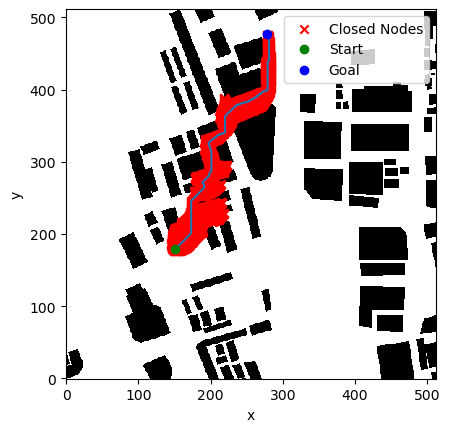

In [12]:
print("Plotting PNO")
testheuristiconmaps(starttest, goaltest, maptest, planningoperator, plotresults=True, printvalues=True, erosion = 1, model=model, saveplotdata=False)

Plotting PNO
Average Path Cost: 369.77669529663757 
Average Planning Time: 0.539813756942749 
Average Number of Node Expansions: 7654.0 
Average Success Rate: 1.0


(369.77669529663757, 0.539813756942749, 0, 7654.0, 1.0)

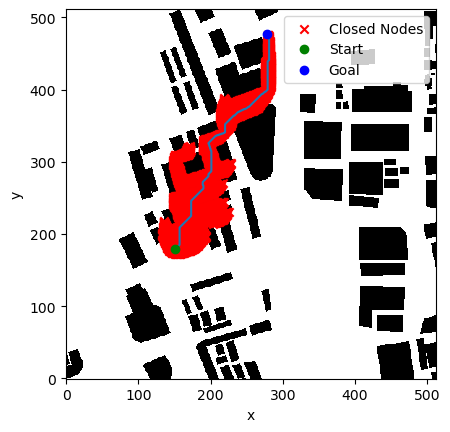

In [13]:
print("Plotting PNO")
testheuristiconmaps(starttest, goaltest, maptest, planningoperator, plotresults=True, printvalues=True, erosion = 7, model=model, saveplotdata=False)